Data downloaded successfully!


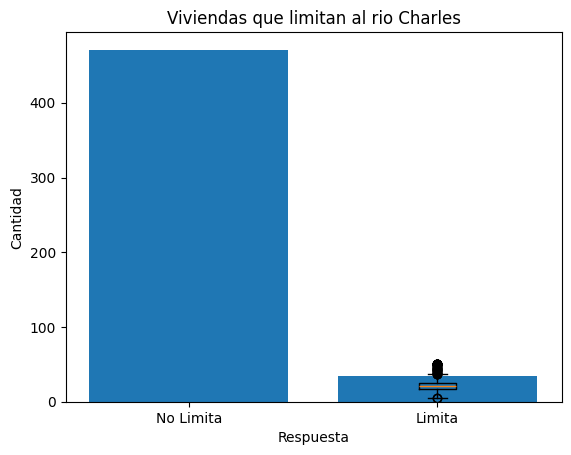

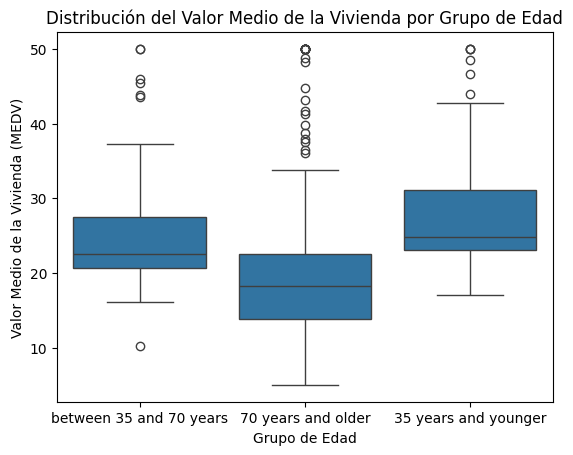

C:\Users\vazqu\AppData\Local\Temp\ipykernel_9520\2719282040.py:64: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['MEDV'],


<function matplotlib.pyplot.show(close=None, block=None)>

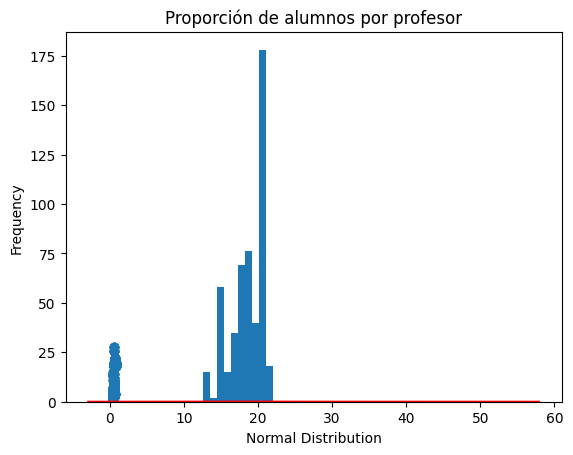

In [14]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import io

import requests
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

response = requests.get(URL)

if response.status_code == 200:
  df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
  print("Data downloaded successfully!")
else:
  print(f"Error downloading data. Status code: {response.status_code}")

df = df.drop("Unnamed: 0", axis=1)

df.head(10)

plt.boxplot(df["MEDV"])
plt.title("Valor medio de las viviendas ocupadas por sus propietarios")
plt.ylabel("Miles de USD $")


counts = df["CHAS"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ['No Limita', 'Limita'])
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.title('Viviendas que limitan al rio Charles')
plt.show()

df.loc[(df["AGE"]<=35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"]>35)&(df["AGE"]<70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"]>=70),'age_group'] = '70 years and older'
df.head()


sns.boxplot(x='age_group', y='MEDV', data=df)
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Medio de la Vivienda (MEDV)')
plt.title('Distribución del Valor Medio de la Vivienda por Grupo de Edad')
plt.show()


plt.scatter(df["NOX"],df["INDUS"])
plt.title("Relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas")
plt.xlabel("Concentraciones de óxido nítrico ")
plt.ylabel("Proporción de acres comerciales no minoristas")

plt.hist(df["PTRATIO"])
plt.title("Proporción de alumnos por profesor")
plt.xlabel("Cantidad profesores")
plt.ylabel("Cantidad alumnos")

ax = sns.distplot(df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show

grupo_A = df[df['CHAS'] == 0]['MEDV']
grupo_B = df[df['CHAS'] == 1]['MEDV']

# Realizar la prueba T
t_statistic, p_value = scipy.stats.ttest_ind(grupo_A, grupo_B, equal_var =False)

print('Estadístico T:', t_statistic)
print('Valor p:', p_value)



alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula. Hay una diferencia significativa entre los grupos.')
else:
    print('No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa.')